## Central Limit Theorem Class

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt   # for plotting 
import seaborn as sns  # for plotting 
import math as mt
import statistics as st
import random
import numpy as np  
random.seed=50

def get_input(input_message,warnging_message):
    while True:
        try:
            value = int(input(input_message))
            if value <=0: 
                print(warnging_message)
                continue
        except ValueError:
            print(warnging_message)
            continue
        break
    return int(value)
    
class CLT:
    number_of_tosses=0
    size_of_sample = 0
    number_of_samples= 0
    tosses=[]
    samples=[]

    def __init__(self):
        self.set_number_of_tosses()
        self.set_size_of_sample()
        self.set_number_of_samples()
        
    def set_number_of_tosses(self):
        input_message="Enter the number of tosses you would like to be performed: "
        warnging_message="that's not a valid number of tosses. Try again \n"
        self.number_of_tosses=get_input(input_message,warnging_message)
    
    def set_size_of_sample(self):
        input_message="Enter the size of sample you would like to be taken: "
        warnging_message="that's not a valid size of samples. Try again \n"
        self.size_of_sample=get_input(input_message,warnging_message)
        while  self.size_of_sample > self.number_of_tosses:
            print("Size of sample should be strictly lower than the number of tosses\n")
            self.size_of_sample=get_input(input_message,warnging_message)
        
    def set_number_of_samples(self):
        input_message="Enter the number of samples you would like to be taken: "
        warnging_message="that's not a valid number of samples. Try again \n"
        self.number_of_samples=get_input(input_message,warnging_message)
    
    def simulate_Coin_tosses(self):
        self.tosses= [np.random.binomial(1, 0.5) for i in range(self.number_of_tosses)]

    def simulate_Dice_tosses(self):
        self.tosses= [random.randint(1, 6)for i in range(self.number_of_tosses)]
                  
    def simulate_Poisson(self):
        self.tosses=np.random.poisson(6, self.number_of_tosses).tolist()
        
    def simulate_Exponential(self):
        self.tosses=np.random.exponential(3.45, self.number_of_tosses).tolist()
         
    def simulate_samples(self):
        self.samples=[st.mean(random.sample(self.tosses, self.size_of_sample))
                      for i in range(self.number_of_samples)]

    def displaySample(self):
        fig=plt.figure(figsize=(8,6))
        fig.add_subplot(1,2,1)
        
        original_distribution=self.tosses
        num_bins =round(1+ mt.log2(self.number_of_tosses))
        ax=sns.histplot(data=original_distribution, bins=num_bins, stat='density', kde = True)
        sns.kdeplot(data=original_distribution, color="crimson")
        ax.set_title("Original Distribution ",size=10,fontweight="bold")
        ax.set_xlabel("Values",size=12)
        ax.set_ylabel("Tosses",size=12)
        
        fig.add_subplot(1,2,2)
        set_of_point = np.asarray(self.samples)       
        num_bins =round(1+ mt.log2(self.number_of_samples))
        set_of_point = self.samples                
        ax1=sns.histplot(data=set_of_point, bins=num_bins, stat='density', kde = True)
        sns.kdeplot(data=set_of_point, color="crimson")
        ax1.set_title("(" + str(self.number_of_samples) + " Samples) ",
                  size=10,fontweight="bold")
        ax1.set_xlabel("Mean",size=12)
        ax1.set_ylabel("Frequency",size=12)
        fig.tight_layout()
        plt.show

         
    def showInAction(self):
        set_of_point = np.asarray(self.samples)
        original_number_of_samples=self.number_of_samples
        fig, axes = plt.subplots(2,3,figsize=(10,10))
    
        for i in range(0,6):
            self.number_of_samples=original_number_of_samples*((2**(i+1))%(self.number_of_tosses//2))
            num_bins =round(1+ mt.log2(self.number_of_samples))
            ax=axes[i//3][i%3]
            self.simulate_samples()
            set_of_point = self.samples
            ax=sns.histplot(data=set_of_point, bins=num_bins, stat='density', kde = True,ax=ax)
            sns.kdeplot(data=set_of_point, color="crimson",ax=ax)
            ax.set_title("(" + str(self.number_of_samples) + " Samples) ",size=10,fontweight="bold")
            ax.set_xlabel("Mean",size=10)
            ax.set_ylabel("Frequency",size=10)
            
        fig.tight_layout()
        self.number_of_samples=original_number_of_samples
        self.simulate_samples()
        plt.show()

## Initializing an instance of Central Limit Theorem 

In [3]:
model = CLT()

Enter the number of tosses you would like to be performed: 10000
Enter the size of sample you would like to be taken: 20
Enter the number of samples you would like to be taken: 30


## Binomial Distribution

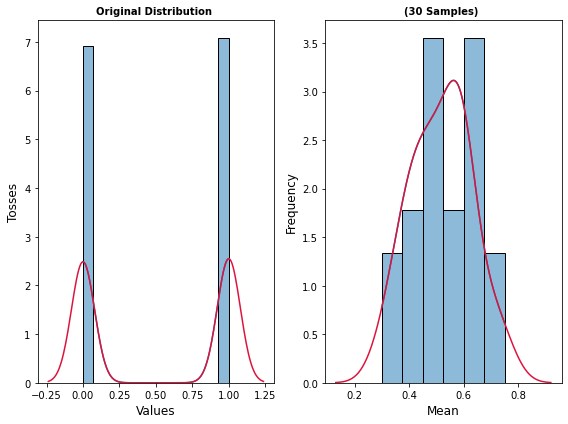

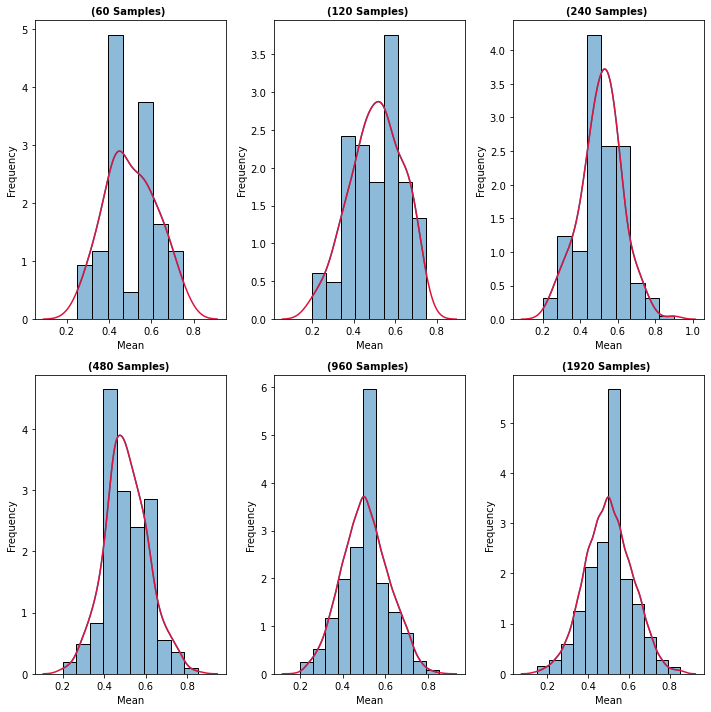

In [4]:
model.simulate_Coin_tosses()
model.simulate_samples()
model.displaySample()
model.showInAction()

## Poisson Distribution

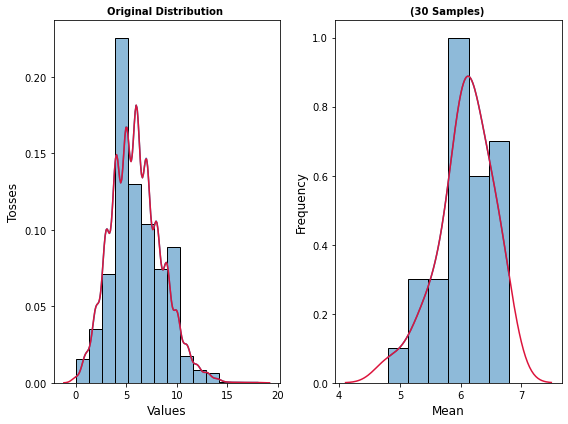

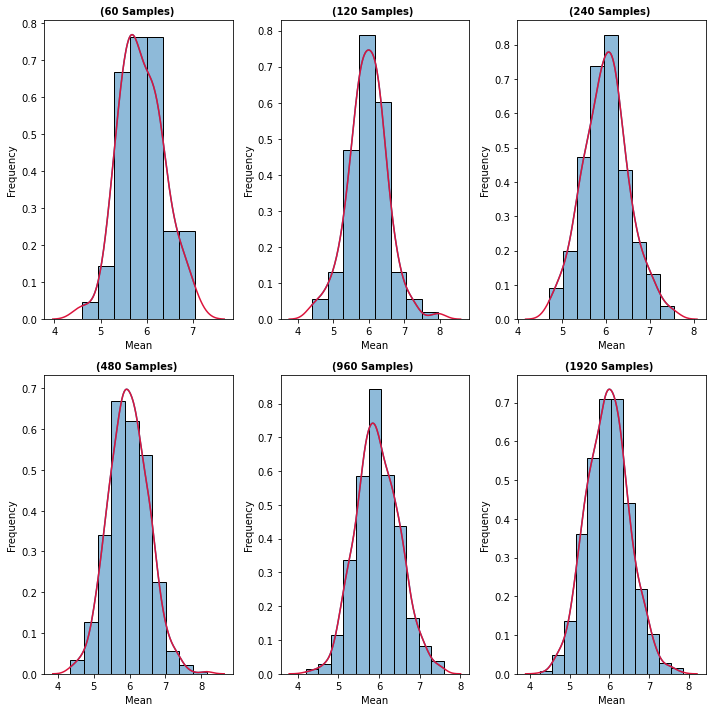

In [5]:
model.simulate_Poisson()
model.simulate_samples()
model.displaySample()
model.showInAction()


## Discrete Uniform Distribution

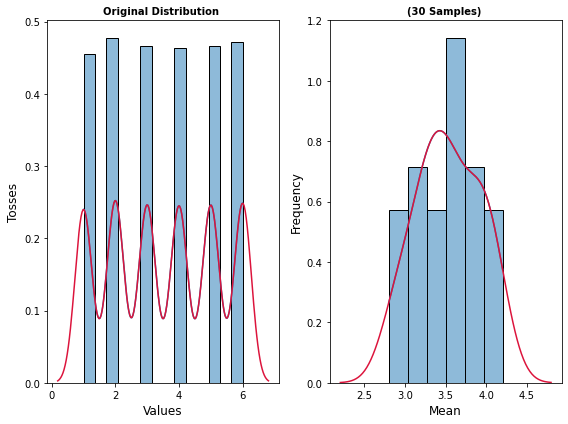

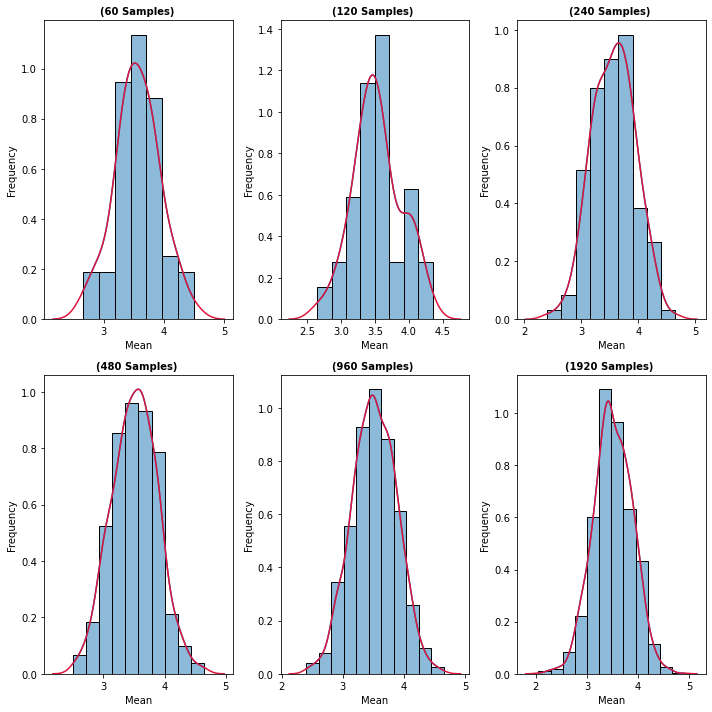

In [6]:
model.simulate_Dice_tosses()
model.simulate_samples()
model.displaySample()
model.showInAction()



## Exponential Distribuion

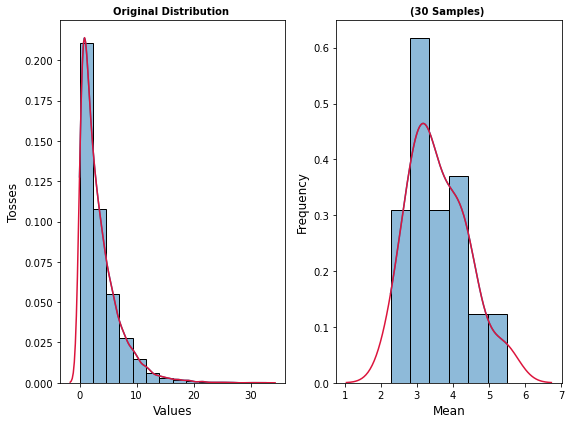

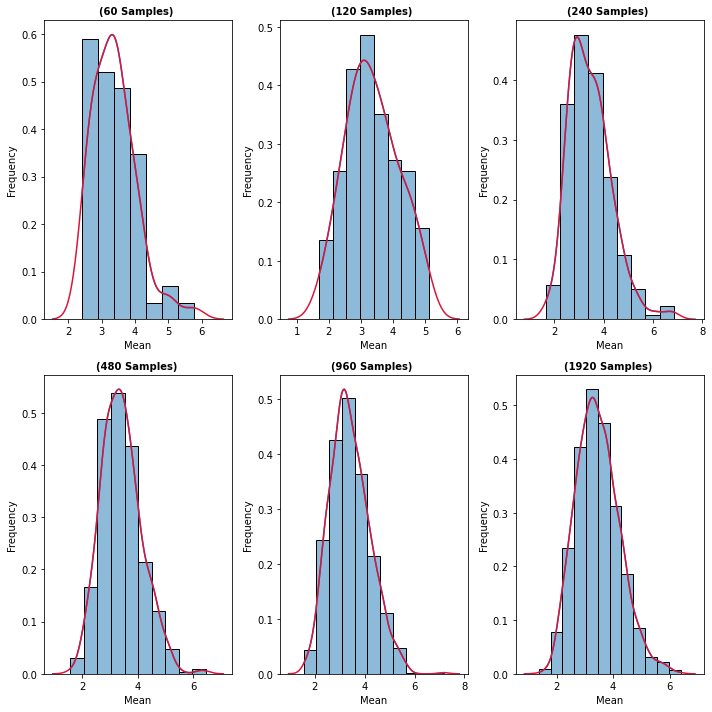

In [7]:
model.simulate_Exponential()
model.simulate_samples()
model.displaySample()
model.showInAction()

# Conclusion:

## At the end we can see that the central Limit Theorem works with any kind of distribution,and it is a way for us to normalize our data and transform it into something useful That we can use in our machine learning algorithms.
## the more Samples we take the more similar our distribution comes to a normal distribution.